In [1]:
import arviz as az
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
import etho_bayes as et_b

In [3]:
df = pd.read_csv("resultado_bayes.csv")

In [4]:
df.head()

,macho_p_imobilidade_flx,macho_p_imobilidade_veiculo,macho_dif_p,femea_p_imobilidade_flx,femea_p_imobilidade_veiculo,femea_dif_p
0,0.294895,0.303008,-0.008113,0.313319,0.313710,-0.000391
1,0.229780,0.317713,-0.087933,0.327894,0.249025,0.078869
2,0.164747,0.263492,-0.098745,0.273994,0.182879,0.091115
3,0.228981,0.294211,-0.065230,0.304585,0.248223,0.056362
4,0.235410,0.277256,-0.041846,0.287720,0.254672,0.033047


In [5]:
m_flx = et_b.creat_struct_saida(np.array(df["macho_p_imobilidade_flx"]))

m_flx["prob"] =[0.00, 0.00]
m_vei = et_b.creat_struct_saida(np.array(df["macho_p_imobilidade_veiculo"]))
m_vei["prob"] =[1, 1]


f_flx = et_b.creat_struct_saida(np.array(df["femea_p_imobilidade_flx"]))
f_flx["prob"] =[2, 2]

f_vei = et_b.creat_struct_saida(np.array(df["femea_p_imobilidade_veiculo"]))
f_vei["prob"] =[3, 3]

f_dif_v_t = et_b.creat_struct_saida(np.array(df["femea_dif_p"]))
m_dif_v_t = et_b.creat_struct_saida(np.array(df["macho_dif_p"]))



In [6]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [7]:
def calcula_weights(data):
    weights = np.ones_like(data) / len(data)
    return weights

In [8]:
len(m_flx["data"])

100000

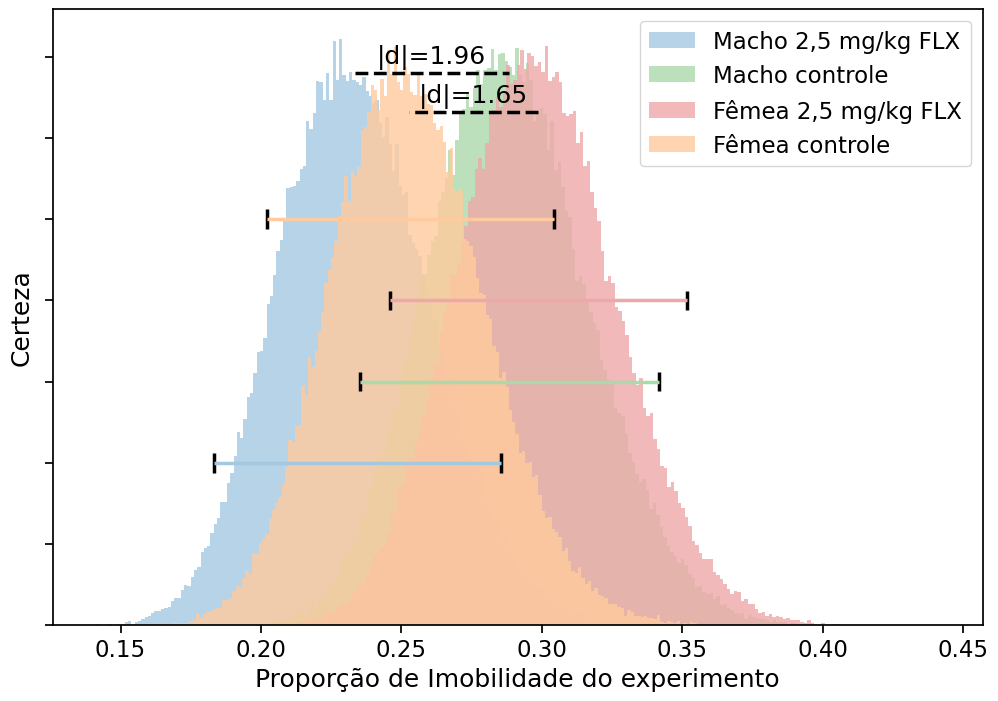

In [9]:
# figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig, axs = plt.subplots(1,1, figsize = (12,8))


axs.hist(m_flx["data"], weights=m_flx["x_weights"], color=(165/255, 200/255, 225/255, 0.8), label="Macho 2,5 mg/kg FLX", bins=200)
axs.hist(m_vei["data"], weights=m_vei["x_weights"],  color=(170/255, 217/255, 170/255, 0.8), label="Macho controle", bins=200)
axs.hist(f_flx["data"], weights=f_flx["x_weights"],color=(238/255, 168/255, 169/255, 0.8) , label="Fêmea 2,5 mg/kg FLX", bins=200)
axs.hist(f_vei["data"], weights=f_vei["x_weights"], color=(255/255, 203/255, 158/255, 0.8) , label="Fêmea controle", bins=200)

# axs[0].tick_params(left = False, labelleft = False)
# sns.distplot(m_flx["data"],hist_kws={'weights': m_flx["x_weights"]}, kde=False, label="Macho tratado com Fluoxetina", ax= axs[0]);
# sns.distplot(m_vei["data"],
#              hist_kws={'weights': m_vei["x_weights"]}, 
#              kde=False, label="Macho controle", ax= axs[0]);




# sns.distplot(f_flx["data"],
#              hist_kws={'weights': m_flx["x_weights"]}, 
#              kde=False, label="Femea tratada com Fluoxetina", ax= axs[0]);



# sns.distplot(f_vei["data"],
#              hist_kws={'weights': m_vei["x_weights"]}, 
#              kde=False, label="Femea controle", ax= axs[0]);


# axs[0].hist(m_flx["data"], weights=calcula_weights(m_flx["data"]))

# m_flx["x_weights"]
# sns.lineplot(x="hdi", y="prob", data=m_vei, label="HDI Macho Veiculo")
# sns.lineplot(x="hdi", y="prob", data=f_flx, label="HDI Femea Fluoxetina")
# sns.lineplot(x="hdi", y="prob", data=m_flx, label="HDI Macho Fluoxetina")
# sns.lineplot(x="hdi", y="prob", data=f_vei, label="HDI Macho Veiculo")


left, right = axs.get_xlim()
axs.set_xlim((left, right))

axs.vlines(m_flx["hdi"][0] , 0.0047,  0.0053, color="black")# color=(165/255, 200/255, 225/255, 0.8))
axs.vlines(m_flx["hdi"][1] , 0.0047,  0.0053, color="black")# color=(165/255, 200/255, 225/255, 0.8))
# axs.hlines(0.0051 , m_flx["hdi"][0],  m_flx["hdi"][1], color="black")# color=(165/255, 200/255, 225/255, 0.8))
axs.hlines(0.005 , m_flx["hdi"][0],  m_flx["hdi"][1], color=(165/255, 200/255, 225/255,1))
# axs.hlines(0.0049 , m_flx["hdi"][0],  m_flx["hdi"][1], color="black")# color=(165/255, 200/255, 225/255, 0.8))


axs.vlines(m_vei["hdi"][0] , 0.0072,  0.0078, color="black")# color=(165/255, 200/255, 225/255, 0.8))
axs.vlines(m_vei["hdi"][1] , 0.0072,  0.0078, color="black")# color=(165/255, 200/255, 225/255, 0.8))
# axs.hlines(0.0074 , m_vei["hdi"][0],  m_vei["hdi"][1],  color="black") #color=(170/255, 217/255, 170/255, 0.8))
axs.hlines(0.0075 , m_vei["hdi"][0],  m_vei["hdi"][1],  color=(170/255, 217/255, 170/255,1)) #color=(170/255, 217/255, 170/255, 0.8))
# axs.hlines(0.0076 , m_vei["hdi"][0],  m_vei["hdi"][1],  color="black") #color=(170/255, 217/255, 170/255, 0.8))


axs.vlines(f_flx["hdi"][0] , 0.0097,  0.0103, color="black")# color=(165/255, 200/255, 225/255, 0.8))
axs.vlines(f_flx["hdi"][1] , 0.0097,  0.0103, color="black")# color=(165/255, 200/255, 225/255, 0.8))
# axs.hlines(0.0099 , f_flx["hdi"][0],  f_flx["hdi"][1],  color="black") #color=(238/255, 168/255, 169/255, 0.8))
axs.hlines(0.01 , f_flx["hdi"][0],  f_flx["hdi"][1],  color=(238/255, 168/255, 169/255, 1)) #color=(238/255, 168/255, 169/255, 0.8))
# axs.hlines(0.0101 , f_flx["hdi"][0],  f_flx["hdi"][1],  color="black") #color=(238/255, 168/255, 169/255, 0.8))

axs.vlines(f_vei["hdi"][0] , 0.0122,  0.0128, color="black")# color=(165/255, 200/255, 225/255, 0.8))
axs.vlines(f_vei["hdi"][1] , 0.0122,  0.0128, color="black")# color=(165/255, 200/255, 225/255, 0.8))
# axs.hlines(0.0124 , f_vei["hdi"][0],  f_vei["hdi"][1], color="black") #color=(255/255, 203/255, 158/255, 0.8) )
axs.hlines(0.0125 , f_vei["hdi"][0],  f_vei["hdi"][1], color=(255/255, 203/255, 158/255, 1)) #color=(255/255, 203/255, 158/255, 0.8) )
# axs.hlines(0.0126 , f_vei["hdi"][0],  f_vei["hdi"][1], color="black") #color=(255/255, 203/255, 158/255, 0.8) )

# sns.lineplot(x="hdi", y="prob", data=m_flx, label="HDI Macho Fluoxetina", ax= axs[1])
# sns.lineplot(x="hdi", y="prob", data=m_vei, label="HDI Macho controle", ax= axs[1])

# sns.lineplot(x="hdi", y="prob", data=f_flx, label="HDI Fêmea Fluoxetina", ax= axs[1])
# sns.lineplot(x="hdi", y="prob", data=f_vei, label="HDI Fêmea controle", ax= axs[1])


# axs.set_xlabel("Distribuição de probabilidade a posteriori da frequencia de Imobilidade")
axs.set_xlabel("Proporção de Imobilidade do experimento")
# axs[1].set_title("Intervalo de credibilidade de 94%")

axs.set_ylabel("Certeza")
# axs[1].set_ylabel("Probabilidade")
axs.set_yticklabels([])


dif_m_f = et_b.data_saida(m_flx["data"], m_vei["data"])
axs.text((m_flx["mean"] + m_vei["mean"])/2, 0.0175, f'|d|={dif_m_f["cohen_d"]:.2f}', horizontalalignment='center', verticalalignment='center')
axs.hlines(0.017 ,   m_flx["mean"], m_vei["mean"], color="black", linestyle='dashed')



dif_m_f = et_b.data_saida(f_flx["data"], f_vei["data"])
axs.text((f_flx["mean"] + f_vei["mean"])/2,0.0163, f'|d|={dif_m_f["cohen_d"]:.2f}', horizontalalignment='center', verticalalignment='center')
axs.hlines(0.0158 ,   f_flx["mean"], f_vei["mean"], color="black", linestyle='dashed')

# axs[1].set_xlabel("Frequencia da expressão de imobilidade a cada segundo de análise")

axs.legend()

plt.savefig('dist_prob_intevalo.png')
# plt.show()

# fmri = {}
# fmri["hdi"] = az.hdi(data, hdi_prob=.94)
# fmri["prob"] =[0.01, 0.01]

In [10]:
# dif_m_f
m_flx

{'data': array([0.29489532, 0.22978002, 0.16474651, ..., 0.23826692, 0.24155303,
        0.25424519]),
 'x_weights': array([1.e-05, 1.e-05, 1.e-05, ..., 1.e-05, 1.e-05, 1.e-05]),
 'mean': 0.23356417748187866,
 'std': 0.02724465028111678,
 'hdi': array([0.18345534, 0.28540327]),
 'prob': [0.0, 0.0]}

In [11]:
def get_data(m_flx, tratamento):
    ls_hdi = list(map(lambda x: f"{x:.3f}", m_flx["hdi"]))
    print(ls_hdi)
    return {"Tratamento": tratamento, "Intervalo de credibilidade": " - ".join(ls_hdi)}


ls = [get_data(m_flx, "Macho 2,5 mg/kg FLX"),
      get_data(m_vei, "Macho controle"),
      get_data(f_flx, "Fêmea 2,5 mg/kg FLX"),
      get_data(f_vei, "Fêmea controle")]

df = pd.DataFrame(ls)

with open("resultado_bayes.txt", "w") as f:
    f.write(df.to_latex())
df

['0.183', '0.285']
['0.235', '0.342']
['0.246', '0.352']
['0.202', '0.304']


,Tratamento,Intervalo de credibilidade
0,"Macho 2,5 mg/kg FLX",0.183 - 0.285
1,Macho controle,0.235 - 0.342
2,"Fêmea 2,5 mg/kg FLX",0.246 - 0.352
3,Fêmea controle,0.202 - 0.304


In [12]:
# min(m_flx["data"] )

# fig, axs = plt.subplots(2,1, figsize = (14,12))
# axs[1].hlines(1 , m_flx["hdi"][0],  m_flx["hdi"][1])

In [13]:
m_flx

{'data': array([0.29489532, 0.22978002, 0.16474651, ..., 0.23826692, 0.24155303,
        0.25424519]),
 'x_weights': array([1.e-05, 1.e-05, 1.e-05, ..., 1.e-05, 1.e-05, 1.e-05]),
 'mean': 0.23356417748187866,
 'std': 0.02724465028111678,
 'hdi': array([0.18345534, 0.28540327]),
 'prob': [0.0, 0.0]}

In [14]:
def calcula_weights(data):
    weights = np.ones_like(data) / len(data)
    return weights
# def create_graph(axs, df, group, sexo):
#     mean  = np.mean(get_dados(df,group))
#     std  = np.std(get_dados(df, group))
#     data = np.random.normal(mean, std, 1000)
#     weights = np.ones_like(data) / len(data)
#     axs.hist(data, weights=weights)

#     my_array = get_dados(df, group)
#     weights = np.ones_like(my_array) / len(my_array)
#     axs.hist(my_array, weights=weights)
#     # axs.hist(data, bins=12, density=True)
#     # axs.hist(my_array, bins=12, density=True)
#     axs.set_ylim([0, 0.4])
#     axs.set_xlim([0, 250])
#     p= stats.shapiro(get_dados(df, group))
#     # print()
#     print(sexo, group, mean, std, p)
#     return axs

/tmp/ipykernel_1259584/1596824013.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(m_dif_v_t["data"],
/tmp/ipykernel_1259584/1596824013.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(f_dif_v_t["data"],


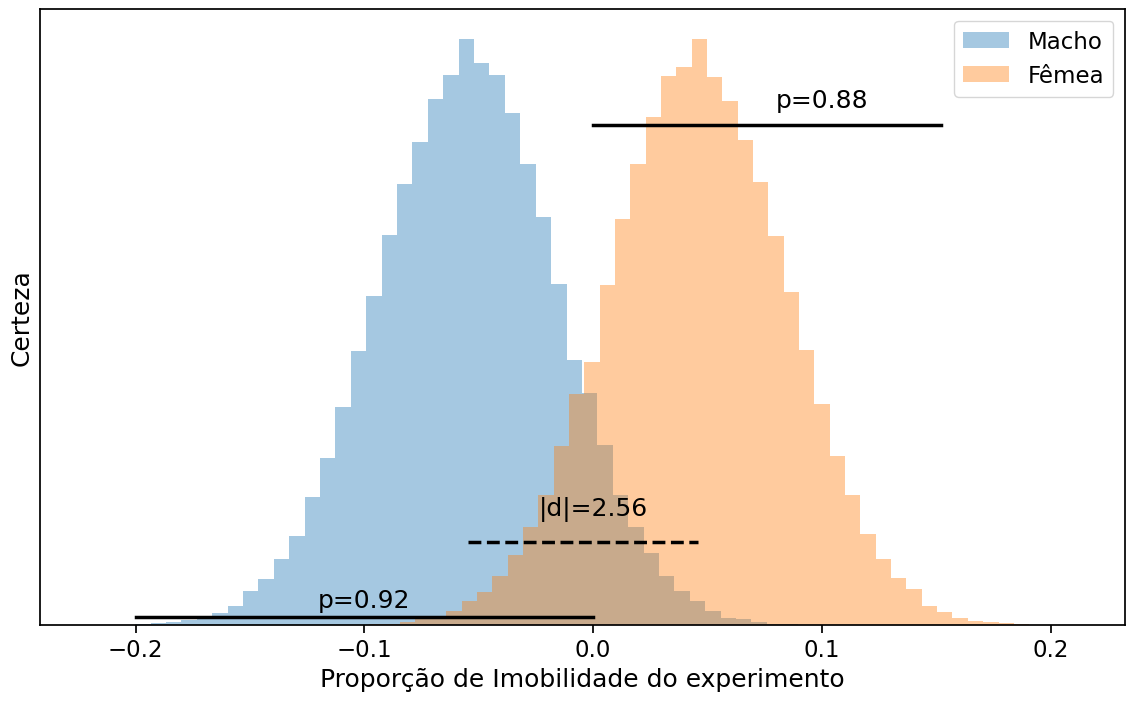

In [15]:
# figure(num=None, figsize=(14, 7), dpi=80, facecolor='w', edgecolor='k')
fig, axs = plt.subplots(1,1, figsize = (14,8))
sns.distplot(m_dif_v_t["data"],
             hist_kws={'weights': m_flx["x_weights"]}, 
             kde=False, label="Macho", ax=axs);


sns.distplot(f_dif_v_t["data"],
             hist_kws={'weights': m_vei["x_weights"]}, 
             kde=False, label="Fêmea", ax=axs);


# axs[0].hist(m_dif_v_t["data"], weights=m_dif_v_t["x_weights"], color=(0, 1, 0, 0.8), label="Macho ", bins=200)

# axs[0].hist(f_dif_v_t["data"], weights=f_dif_v_t["x_weights"], color=(0, 0, 1, 0.8), label="Fêmea", bins=200)


# axs.tick_params(left = False,  labelleft = False)


dif_m_f = et_b.data_saida(m_dif_v_t["data"], f_dif_v_t["data"])
dif_m_f["prob"] = [0.01, 0.01]

sns.lineplot(x="hdi", y="prob", data=dif_m_f, ax=axs , color='black',  linestyle='dashed')#, label="HDI Macho Fluoxetina")#, ax= axs[1])
axs.text(0, 0.014, f'|d|={dif_m_f["cohen_d"]:.2f}', horizontalalignment='center', verticalalignment='center')

p_maior_macho = et_b.calc_p_menor_zero(m_dif_v_t["data"])
p_menor_femea = et_b.calc_p_maior(f_dif_v_t["data"])

sns.lineplot(x="hdi", y="prob", data=p_maior_macho, ax=axs, color='black')#, label="HDI Macho Fluoxetina")#, ax= axs[1])
axs.text(-0.1, 0.003 , f'p={p_maior_macho["p"]:.2f}', horizontalalignment='center', verticalalignment='center')


sns.lineplot(x="hdi", y="prob", data=p_menor_femea, ax=axs , color='black')#, label="HDI Macho Fluoxetina")#, ax= axs[1])
axs.text(0.1, 0.063 , f'p={p_menor_femea["p"]:.2f}', horizontalalignment='center', verticalalignment='center')



# axs.set_title("A diferença entre a Distribuição a Posteriori da frequencia de Imobilidade \n do controle e do tratamento de machos e femêas \n")
# plt.title("Diferença da probabilidade de Imobilidade")
axs.set_ylabel("Certeza")
axs.set_yticks([])
# axs.set_xlabel("Diferença de probabilidade da expressão de imobilidade a cada segundo de análise entre controle e tratamento")
axs.set_xlabel("Proporção de Imobilidade do experimento")
axs.legend()
# plt.show()

# axs[1].hist(m_dif_v_t["data"], weights=m_dif_v_t["x_weights"], cumulative = True, color=(0, 1, 0, 0.8), label="Macho ", bins=200)
# axs[1].hist(f_dif_v_t["data"], weights=f_dif_v_t["x_weights"], cumulative = True, color=(0, 0, 1, 0.8), label="Fêmea", bins=200)

plt.savefig('dif_dis_cohen.png')

In [16]:
# - critica é em relação aos descritores usados, podem estar escondendo sutis diferenças
# - critica em relação ao modelo frequentista de teste de hipotese.

# - aumentar a quantidade de variedade usadas em modelos matematicos que possam aprender com os daos
# - aumentar a variabilidade de modelos matematicos empregados
# - dentro de um fluxo
# - software aberto.

# , metodologias de preprocessamento
# - aumentar a variadade de funcionalidade de modelos matematicos, que possam aprneder com cados, no estudo

In [17]:
# como refinar o modelo
# - media, desvio padrão
# - prior meta analise.
# - analise da literatura das medias de duração
# -

In [18]:
# #Set context, increase font size
# # sns.set_context("poster", font_scale=1.5)
# # #Create a figure
# plt.figure(figsize=(15, 8))
# sns.lineplot(x="hdi", y="prob", data=m_flx, label="HDI Macho Fluoxetina")
# sns.lineplot(x="hdi", y="prob", data=m_vei, label="HDI Macho controle")

# sns.lineplot(x="hdi", y="prob", data=f_flx, label="HDI Femea Fluoxetina")
# sns.lineplot(x="hdi", y="prob", data=f_vei, label="HDI Macho controle")



# # # #Define the axis object
# # # ax = sns.barplot(x='optics graduates', y='inst_nm', data=data1, palette="Blues_d")
# # #set paramters
# # ax.set(xlabel='Optics PhDs awarded', ylabel='Institution name', title= "Top optics-granting institutions")
# # #show the plot
# # plt.show()



# # fig, ax = plt.subplots()
# # ax.plot(activity, dog, label="dog")
# # ax.plot(activity, cat, label="cat")
# # ax.legend()



# # plt.title("Distribuição a posteriori da probabilidade de expressão do comportamento de imobilidade de machos no TNF")
# # plt.ylabel("Distribuição da probabilidade de expressão da imobilidade")
# # plt.xlabel("Probabilidade da expressão de imobilidade a cada segundo de análise")
# plt.legend()
# plt.show()

In [19]:
# figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# graph = sns.distplot(m_dif_v_t["data"],
#              hist_kws={'weights': m_flx["x_weights"]}, 
#              kde=False, label="Macho");


# data_maior = m_dif_v_t["data"] < 0


# saida = m_dif_v_t["data"][data_maior]
# weigh = len(saida) / len(m_dif_v_t["data"])

# wi = np.ones_like(saida) / len(m_dif_v_t["data"])

# # graph.axvline(0, label="0")
# sns.distplot(saida,
#              hist_kws={'weights': wi}, 
#              kde=False, label="Femea");


# # graph.axhline(0.01, xmin=0.15, xmax=0.55)
# # graph.axhspan(0.01, 0.005, facecolor='0.5', alpha=0.5)

# plt.title("Distribuição a posteriori da probabilidade de expressão do comportamento de imobilidade de machos no TNF")
# plt.ylabel("Distribuição da probabilidade de expressão da imobilidade")
# plt.xlabel("Probabilidade da expressão de imobilidade a cada segundo de análise")
# plt.legend()
# plt.show()

In [20]:
# print(weigh)

In [21]:

# saida = f_dif_v_t["data"][data_maior]
# saida

In [22]:
# tips = sns.load_dataset("tips")

In [23]:
#     tips

In [24]:
# data = np.random.normal(size=2000)
# az.hdi(data, hdi_prob=.68)

In [25]:
# az.stats.hdi
